In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
data = pd.read_csv('Desktop/coding/AI exercise/ML_Diabetes_task/diabetes.csv')

df = pd.DataFrame(data)

# 1. Basic information about the dataset
print("="*50)
print("BASIC DATASET INFORMATION")
print("="*50)
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

BASIC DATASET INFORMATION
Dataset shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Preg

## EDA 
###  2. Distribution of each feature: Histograms and Boxplots



DISTRIBUTION ANALYSIS


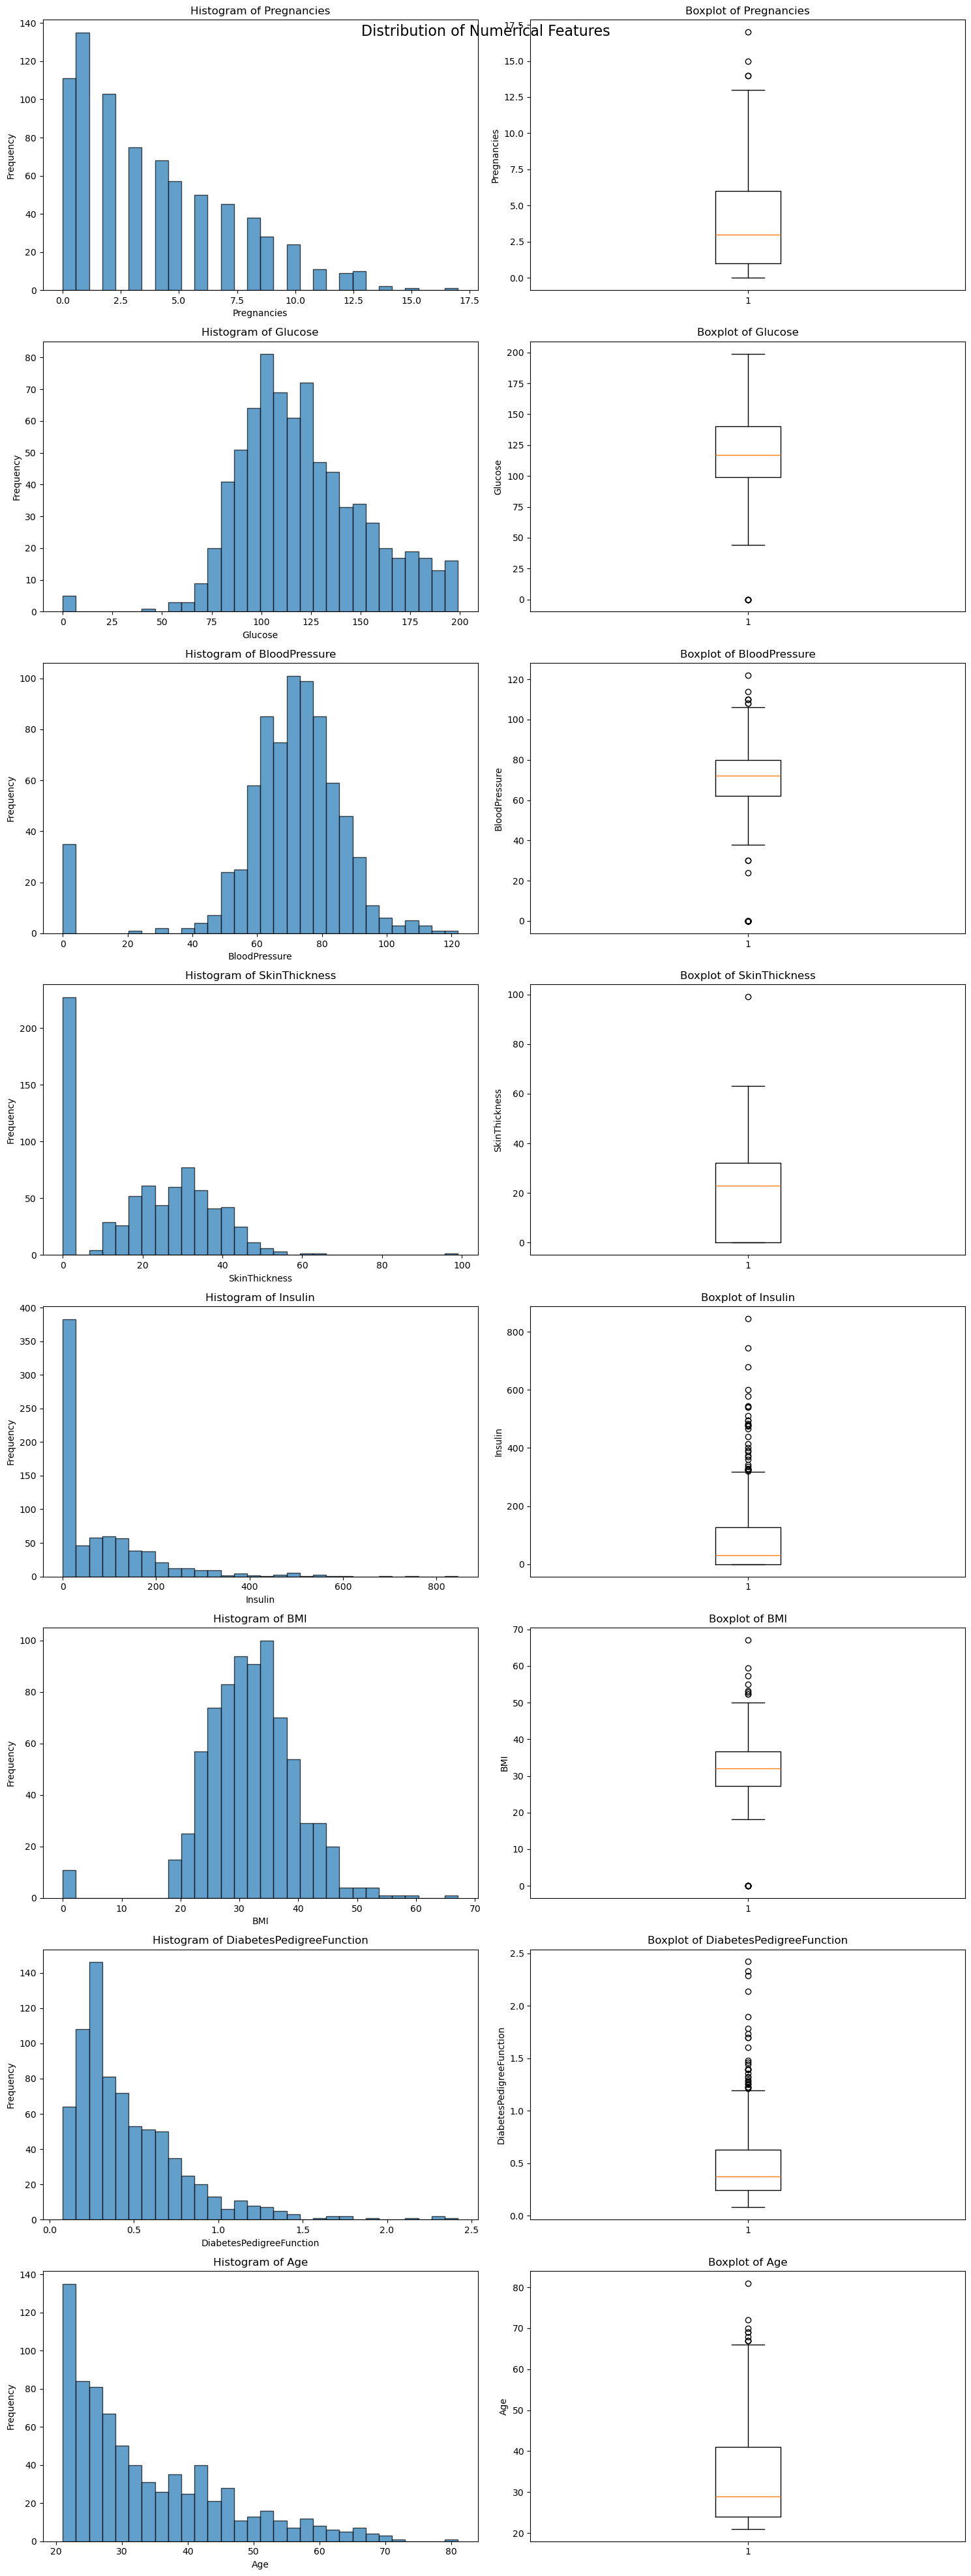

In [11]:
print("\n" + "="*50)
print("DISTRIBUTION ANALYSIS")
print("="*50)

numerical_features = df.columns.drop('Outcome') if 'Outcome' in df.columns else df.columns

# Create subplots for histograms and boxplots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5*len(numerical_features)))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

for i, feature in enumerate(numerical_features):
    # Histogram
    axes[i, 0].hist(df[feature], bins=30, alpha=0.7, edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    
    # Boxplot
    axes[i, 1].boxplot(df[feature])
    axes[i, 1].set_title(f'Boxplot of {feature}')
    axes[i, 1].set_ylabel(feature)

plt.tight_layout()
plt.show()

# 3. Check positive/negative diabetes ratio


TARGET VARIABLE ANALYSIS


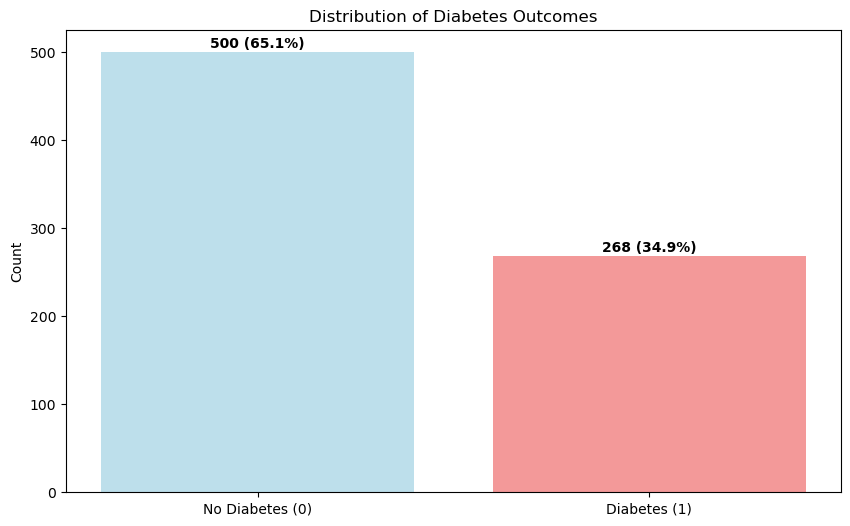

Diabetes positive ratio: 34.90%
Diabetes negative ratio: 65.10%


In [14]:
if 'Outcome' in df.columns:
    print("\n" + "="*50)
    print("TARGET VARIABLE ANALYSIS")
    print("="*50)
    
    # Count plot
    plt.figure(figsize=(10, 6))
    outcome_counts = df['Outcome'].value_counts()
    plt.bar(['No Diabetes (0)', 'Diabetes (1)'], outcome_counts.values, 
            color=['lightblue', 'lightcoral'], alpha=0.8)
    plt.title('Distribution of Diabetes Outcomes')
    plt.ylabel('Count')
# Add percentage labels
    total = len(df)
    for i, count in enumerate(outcome_counts.values):
        plt.text(i, count + 5, f'{count} ({count/total*100:.1f}%)', 
                ha='center', fontweight='bold')
    
    plt.show()
    
    print(f"Diabetes positive ratio: {outcome_counts[1]/total*100:.2f}%")
    print(f"Diabetes negative ratio: {outcome_counts[0]/total*100:.2f}%")



# 4. Correlation matrix and scatter plots


CORRELATION ANALYSIS


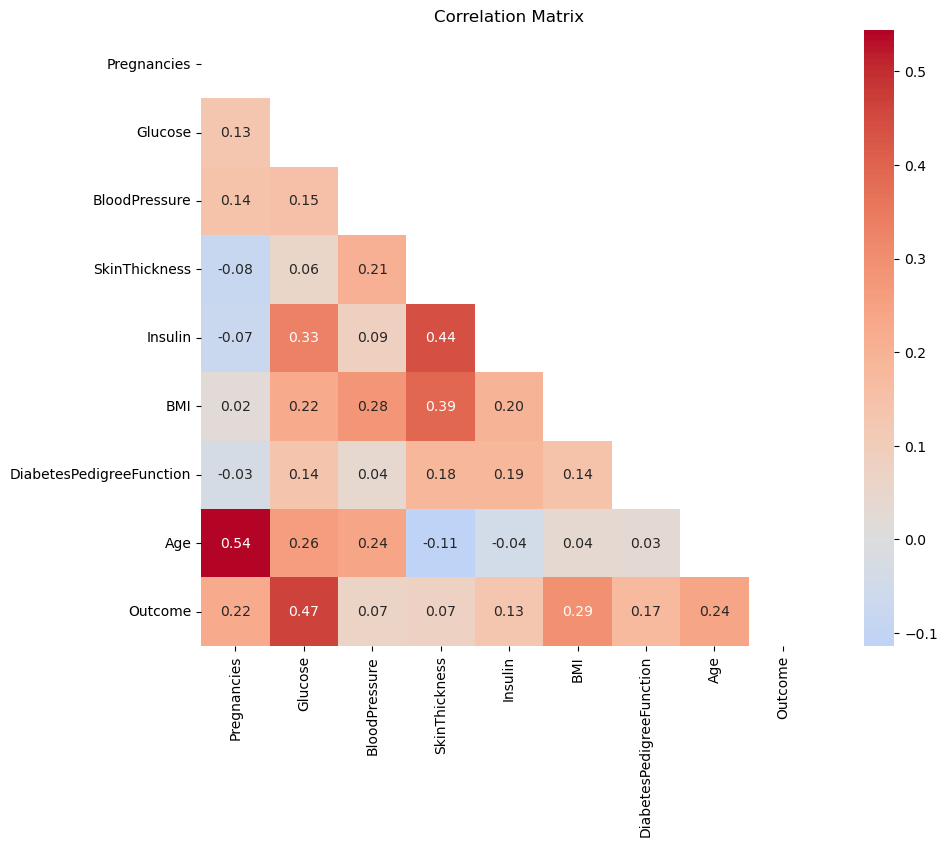

Top correlated feature pairs:
Pregnancies - Age: 0.544
Age - Pregnancies: 0.544
Glucose - Outcome: 0.467
Outcome - Glucose: 0.467
Insulin - SkinThickness: 0.437
SkinThickness - Insulin: 0.437


In [19]:
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            mask=mask,
            fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for highly correlated features (if any)
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr[high_corr < 1].head(6)  # Top 6 correlated pairs

print("Top correlated feature pairs:")
for pair, corr_value in high_corr_pairs.items():
    print(f"{pair[0]} - {pair[1]}: {corr_value:.3f}")

### تفسیر ماترس
1. Pregnancies – Age: 0.544

همبستگی مثبت و نسبتاً قوی (0.54).
یعنی هرچی سن بیشتر باشه، تعداد بارداری هم بیشتره (باافزایش سن احتمال تعداد بارداری بیشتر میشه).

2. Glucose – Outcome: 0.467

همبستگی مثبت متوسط (0.47).
یعنی غلظت گلوکز خون با احتمال ابتلا به دیابت
(Outcome=1) رابطه‌ی مستقیم داره.
این ویژگی خیلی مهمه چون نشان میده که سطح گلوکز شاخص اصلی پیش‌بینی دیابت هست.

3. Insulin – SkinThickness: 0.437

همبستگی مثبت متوسط (0.44).
یعنی افرادی که میزان انسولین بالاتری دارن، معمولاً ضخامت چین پوستی (Skin Thickness) 
بیشتری هم دارن.
این رابطه نشون میده که انسولین و شاخص‌های چربی بدن به هم مرتبط هستن.


جمع‌بندی

بالاترین همبستگی (0.544) بین Pregnancies و Age هست،
ولی این ویژگی‌ها اطلاعات تکراری (redundant)
دارن چون هر دو تقریباً یک چیز رو توضیح میدن 
(سن بیشتر → بارداری بیشتر).

Glucose با Outcome (0.467)
رابطه‌ی مهمی داره⇒ یعنی متغیر Glucose یکی از قوی‌ترین پیش‌بینی‌کننده‌ها برای دیابت است.
Insulin با SkinThickness (0.437) همبستگی داره ⇒ اینا می‌تونن نشون بدن که تجمع چربی و عملکرد انسولین با هم در ارتباطن.
###

In [28]:
print("\n" + "="*50)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*50)

# Identify categorical features (example - you might need to adjust this)
categorical_features = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_features) > 0:
    for feature in categorical_features:
        plt.figure(figsize=(12, 6))
        
        # Count plot
        value_counts = df[feature].value_counts()
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar', color='skyblue', alpha=0.8)
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45)
               
        # Relationship with target (if exists)
        if 'Outcome' in df.columns:
            plt.subplot(1, 2, 2)
            sns.countplot(data=df, x=feature, hue='Outcome')
            plt.title(f'{feature} vs Diabetes Outcome')
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
else:
    print("No categorical features found in the dataset.")


CATEGORICAL FEATURES ANALYSIS
No categorical features found in the dataset.


In [31]:
print("\n" + "="*50)
print("OUTLIER DETECTION")
print("="*50)

# Using Z-score for outlier detection
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)

print("Number of outliers (Z-score > 3) per feature:")
for feature, count in zip(df.select_dtypes(include=[np.number]).columns, outliers):
    print(f"{feature}: {count} outliers")


OUTLIER DETECTION
Number of outliers (Z-score > 3) per feature:
Pregnancies: 4 outliers
Glucose: 5 outliers
BloodPressure: 35 outliers
SkinThickness: 1 outliers
Insulin: 18 outliers
BMI: 14 outliers
DiabetesPedigreeFunction: 11 outliers
Age: 5 outliers
Outcome: 0 outliers



MULTIVARIATE ANALYSIS


<Figure size 1200x1000 with 0 Axes>

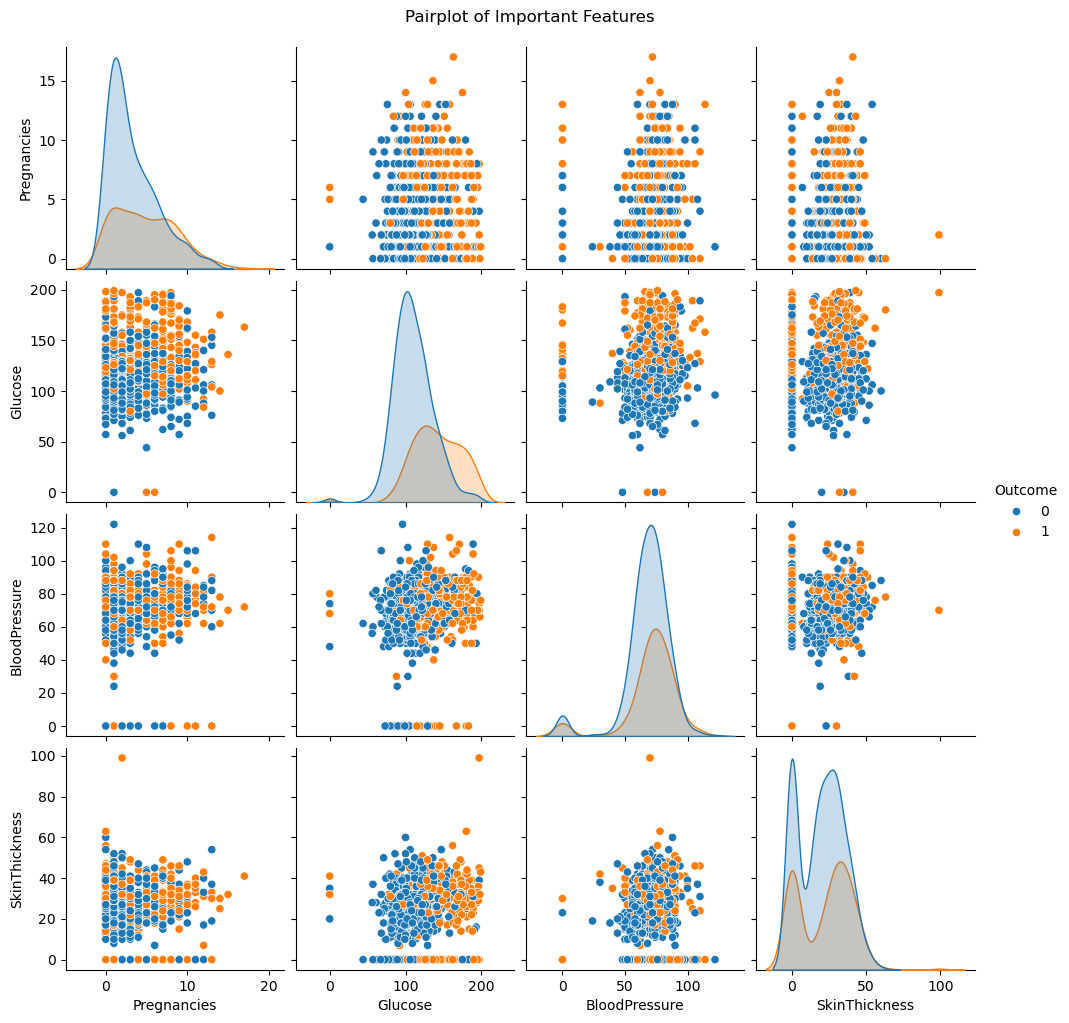

In [33]:
print("\n" + "="*50)
print("MULTIVARIATE ANALYSIS")
print("="*50)

# Select a subset of features for pairplot to avoid overcrowding
important_features = numerical_features[:4]  # First 4 features
if 'Outcome' in df.columns:
    important_features = list(important_features) + ['Outcome']

plt.figure(figsize=(12, 10))
sns.pairplot(df[important_features], hue='Outcome' if 'Outcome' in df.columns else None)
plt.suptitle('Pairplot of Important Features', y=1.02)
plt.show()
